In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import asts

In [4]:
df = pd.read_csv(r'C:\Users\User\Documents\COVID\registration.csv')
df

,date,last7DaysRegistration_female,last7DaysRegistration_male,last7DaysRegistration_others,last7DaysRegistration_total,registration_female,registration_flwAndHcw,registration_male,registration_online,registration_onspot,...,sessions_govt,sessions_pvt,sessions_today,sessions_total,sites_govt,sites_pvt,sites_today,sites_total,registration_cit_18_45,registration_cit_45_above
0,2021-06-24,"[1357248, 1320401, 1464438, 1966911, 3722622, ...","[1635264, 1591077, 1718822, 1584279, 4241556, ...","[854, 936, 917, 967, 1566, 1338, 1583]","[2993366, 2912414, 3184177, 3552157, 7965744, ...",NaN,NaN,NaN,NaN,NaN,...,15082961.0,1078892.0,NaN,16161853.0,37967.0,1336.0,NaN,39303.0,145851823.0,176406021.0
1,2021-06-23,"[1473646, 1359200, 1322595, 1466795, 1970154, ...","[1749388, 1638218, 1594405, 1722477, 1589140, ...","[794, 860, 943, 920, 970, 1567, 1346]","[3223828, 2998278, 2917943, 3190192, 3560264, ...",NaN,NaN,NaN,NaN,NaN,...,25636344.0,1468771.0,NaN,27105115.0,57356.0,2106.0,NaN,59462.0,146024777.0,176451174.0
2,2021-06-22,"[1207900, 1475677, 1361641, 1325161, 1469863, ...","[1460737, 1752461, 1641725, 1598497, 1726988, ...","[875, 799, 863, 948, 926, 983, 1590]","[2669512, 3228937, 3004229, 2924606, 3197777, ...",NaN,NaN,NaN,NaN,NaN,...,21952122.0,1484144.0,NaN,23436266.0,52489.0,2150.0,NaN,54639.0,141448004.0,174967777.0
3,2021-06-21,"[1699508, 1210316, 1478359, 1364744, 1328669, ...","[1882015, 1464187, 1756473, 1646613, 1603952, ...","[953, 879, 803, 869, 951, 934, 998]","[3582476, 2675382, 3235635, 3012226, 2933572, ...",NaN,NaN,NaN,NaN,NaN,...,33501516.0,1508795.0,NaN,35010311.0,65984.0,2077.0,NaN,68061.0,137609508.0,173611620.0
4,2021-06-20,"[911115, 1701555, 1212304, 1480500, 1367398, 1...","[1062674, 1884730, 1467084, 1759688, 1650723, ...","[505, 957, 891, 807, 874, 955, 938]","[1974294, 3587242, 2680279, 3240995, 3018995, ...",NaN,NaN,NaN,NaN,NaN,...,11807038.0,929371.0,NaN,12736409.0,23701.0,1065.0,NaN,24766.0,132107949.0,171710966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2021-03-12,"[446979, 898105, 42112, 699391, 431370, 430842...","[554364, 1069025, 52725, 746658, 504920, 50589...","[115, 225, 8, 170, 103, 105, 31]","[1001458, 1967355, 94845, 1446219, 936393, 936...",12316098.0,NaN,17051007.0,NaN,NaN,...,4661673.0,767255.0,NaN,5428928.0,29076.0,5413.0,NaN,34489.0,NaN,NaN
105,2021-03-11,"[342823, 446979, 898105, 42112, 699391, 431370...","[444744, 554364, 1069025, 52725, 746658, 50492...","[60, 115, 225, 8, 170, 103, 105]","[787627, 1001458, 1967355, 94845, 1446219, 936...",11629810.0,NaN,16220630.0,NaN,NaN,...,1494552.0,579755.0,NaN,2074307.0,9738.0,4182.0,NaN,13920.0,NaN,NaN
106,2021-03-10,"[253398, 342823, 446979, 898105, 42112, 699391...","[332957, 444744, 554364, 1069025, 52725, 74665...","[96, 60, 115, 225, 8, 170, 103]","[586451, 787627, 1001458, 1967355, 94845, 1446...",11469408.0,NaN,16032197.0,NaN,NaN,...,3016231.0,696359.0,NaN,3712590.0,17951.0,4934.0,NaN,22885.0,NaN,NaN
107,2021-03-09,"[260148, 253398, 342823, 446979, 898105, 42112...","[340094, 332957, 444744, 554364, 1069025, 5272...","[119, 96, 60, 115, 225, 8, 170]","[600361, 586451, 787627, 1001458, 1967355, 948...",11037934.0,NaN,15525381.0,NaN,NaN,...,2970087.0,662143.0,NaN,3632230.0,17827.0,4735.0,NaN,22562.0,NaN,NaN


In [5]:
print("Data shape (rows, columns):", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

Data shape (rows, columns): (109, 23)

Column names:
['date', 'last7DaysRegistration_female', 'last7DaysRegistration_male', 'last7DaysRegistration_others', 'last7DaysRegistration_total', 'registration_female', 'registration_flwAndHcw', 'registration_male', 'registration_online', 'registration_onspot', 'registration_others', 'registration_today', 'registration_total', 'sessions_govt', 'sessions_pvt', 'sessions_today', 'sessions_total', 'sites_govt', 'sites_pvt', 'sites_today', 'sites_total', 'registration_cit_18_45', 'registration_cit_45_above']


In [6]:
# Convert date column to proper date format
df['date'] = pd.to_datetime(df['date'])

# Sort by date (oldest to newest)
df = df.sort_values('date').reset_index(drop=True)

# Show date range
print("Date range:", df['date'].min(), "to", df['date'].max())
print("Total days:", len(df))

Date range: 2021-03-08 00:00:00 to 2021-06-24 00:00:00
Total days: 109


In [9]:
# Check missing values
print("Missing values in each column:")
print(df.isnull().sum())

daily_columns = ['registration_today', 'sessions_today', 'sites_today']

for col in daily_columns:
    if col in df.columns:
        df[col] = df[col].fillna(0)

total_columns = ['registration_total', 'sessions_total', 'sites_total']

for col in total_columns:
    if col in df.columns:
        df[col] = df[col].fillna(method='ffill')

Missing values in each column:
date                             0
last7DaysRegistration_female     0
last7DaysRegistration_male       0
last7DaysRegistration_others     0
last7DaysRegistration_total      0
registration_female             54
registration_flwAndHcw          62
registration_male               54
registration_online             62
registration_onspot             62
registration_others             54
registration_today               0
registration_total               0
sessions_govt                    0
sessions_pvt                     0
sessions_today                   0
sessions_total                   0
sites_govt                       0
sites_pvt                        0
sites_today                      0
sites_total                      0
registration_cit_18_45          55
registration_cit_45_above       55
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_10608\1782722423.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


In [10]:
# Add time-based columns
df['month'] = df['date'].dt.month
df['day_name'] = df['date'].dt.day_name()
df['week_number'] = df['date'].dt.isocalendar().week

month_names = {3: 'March', 4: 'April', 5: 'May', 6: 'June'}
df['month_name'] = df['month'].map(month_names)

print("Sample of new columns:")
print(df[['date', 'month_name', 'day_name', 'week_number']].head())

Sample of new columns:
        date month_name   day_name  week_number
0 2021-03-08      March     Monday           10
1 2021-03-09      March    Tuesday           10
2 2021-03-10      March  Wednesday           10
3 2021-03-11      March   Thursday           10
4 2021-03-12      March     Friday           10


In [12]:
# basic statistics for important columns
important_cols = ['registration_today', 'registration_total', 'sessions_today', 'sessions_total']

print("Basic Statistics:")
for col in important_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Average: {df[col].mean():,.0f}")
        print(f"  Maximum: {df[col].max():,.0f}")
        print(f"  Minimum: {df[col].min():,.0f}")

Basic Statistics:

registration_today:
  Average: 2,733,713
  Maximum: 13,267,272
  Minimum: 23,059

registration_total:
  Average: 163,142,024
  Maximum: 322,475,958
  Minimum: 25,621,639

sessions_today:
  Average: 0
  Maximum: 0
  Minimum: 0

sessions_total:
  Average: 9,041,469
  Maximum: 35,010,311
  Minimum: 935,045


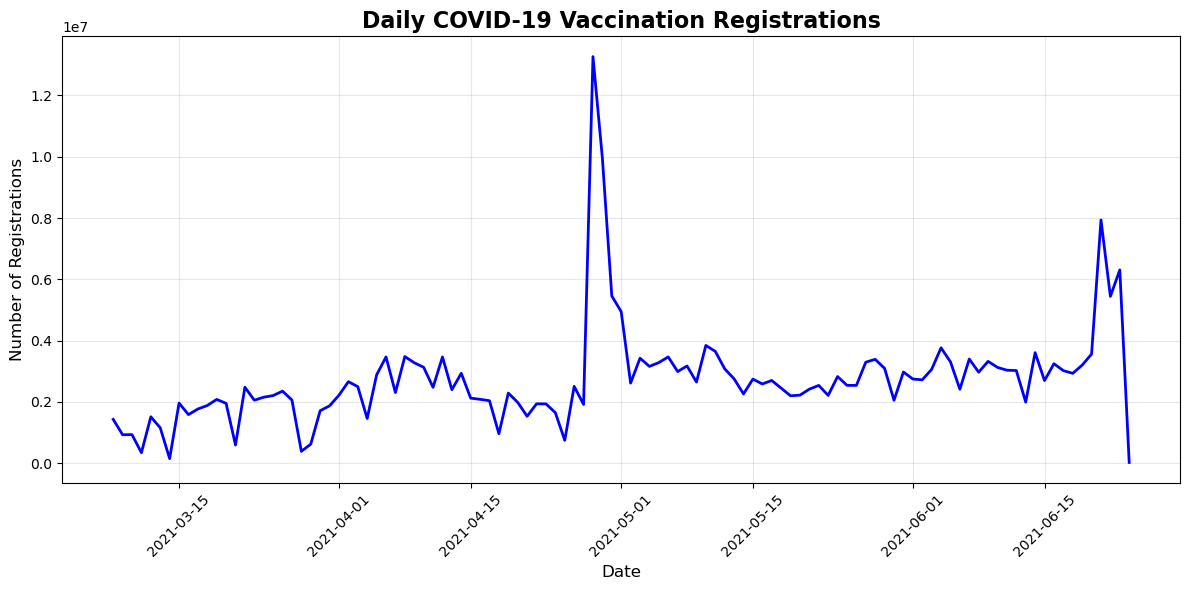

In [27]:
plt.style.use('default')

# Plot 1: Daily registrations over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['registration_today'], color='blue', linewidth=2)
plt.title('Daily COVID-19 Vaccination Registrations', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Registrations', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

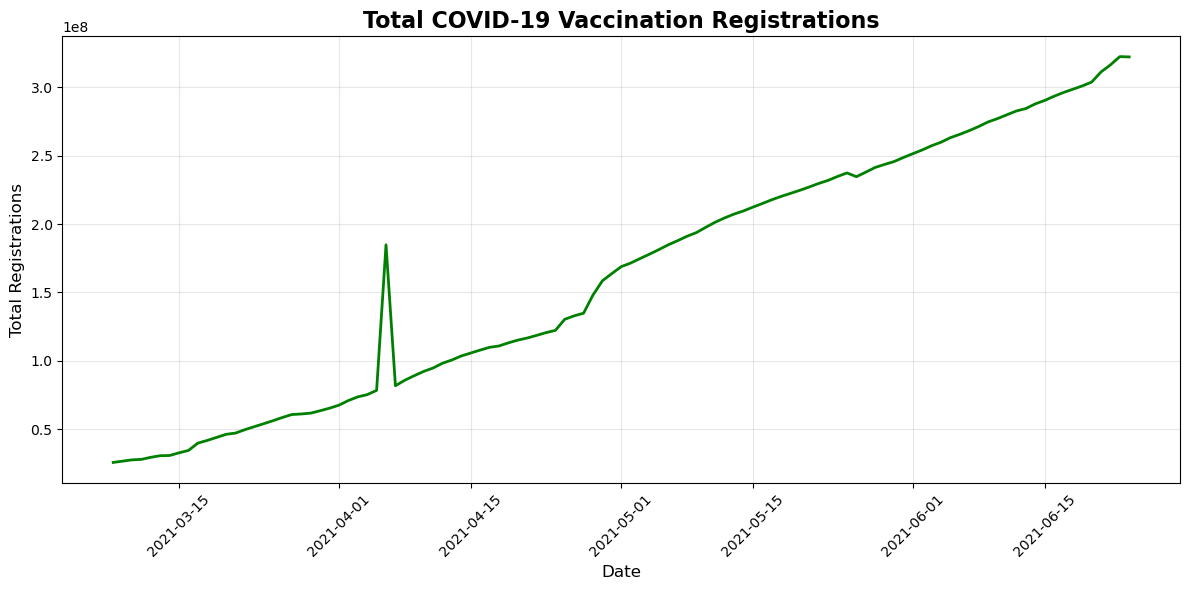

In [30]:
# Plot 2: Total registrations over time
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["registration_total"], color="green", linewidth=2)
plt.title("Total COVID-19 Vaccination Registrations", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

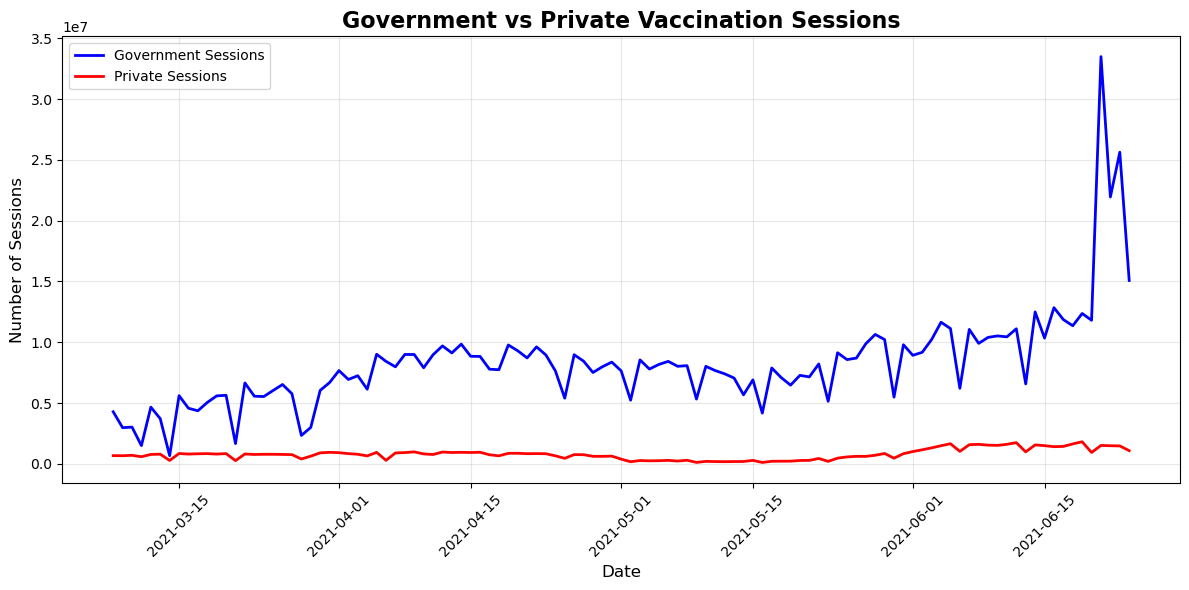

In [25]:
# Plot 3: Government vs Private Vaccination Sessions
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['sessions_govt'], color='blue', linewidth=2, label='Government Sessions')
plt.plot(df['date'], df['sessions_pvt'], color='red', linewidth=2, label='Private Sessions')
plt.title('Government vs Private Vaccination Sessions', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

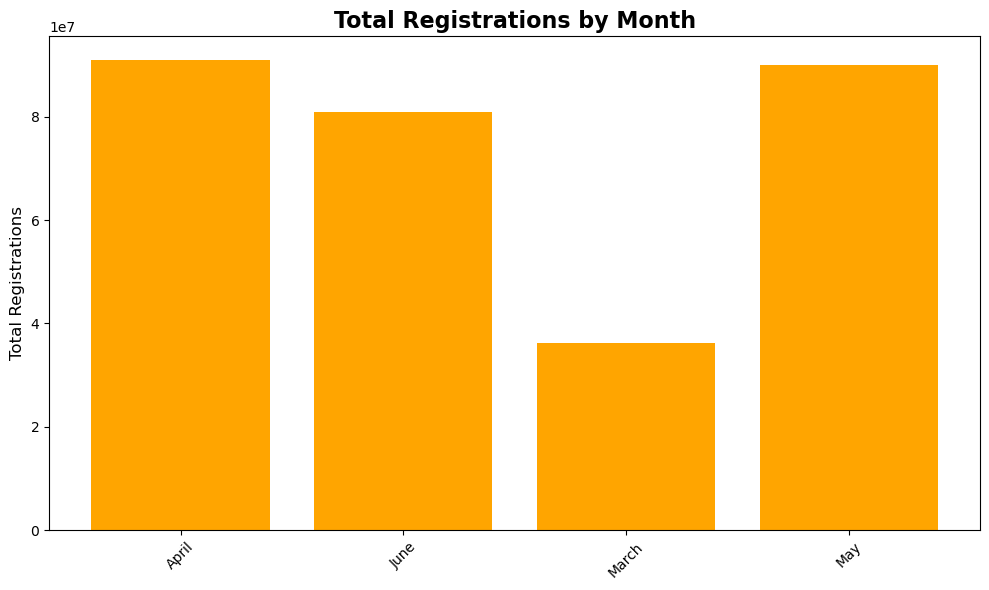

In [24]:
# Plot 4: Monthly comparison (bar chart)
monthly_data = df.groupby("month_name")["registration_today"].sum()
plt.figure(figsize=(10, 6))
plt.bar(monthly_data.index, monthly_data.values, color="orange")
plt.title("Total Registrations by Month", fontsize=16, fontweight="bold")
plt.ylabel("Total Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
print("=== INTERESTING FACTS ===")

# Busiest day
busiest_day = df.loc[df['registration_today'].idxmax()]
print(f"Busiest registration day: {busiest_day['date'].strftime('%B %d, %Y')}")
print(f"Registrations that day: {busiest_day['registration_today']:,.0f}")

# Busiest month
busiest_month = df.groupby('month_name')['registration_today'].sum().idxmax()
print(f"Busiest month: {busiest_month}")

# Avg registrations by DOW
day_averages = df.groupby('day_name')['registration_today'].mean().sort_values(ascending=False)
print(f"Best day of week for registrations: {day_averages.index[0]}")
print("Average registrations by day of week:")
for day, avg in day_averages.items():
    print(f"{day}: {avg:,.0f}")

=== INTERESTING FACTS ===
Busiest registration day: April 28, 2021
Registrations that day: 13,267,272
Busiest month: April
Best day of week for registrations: Wednesday
Average registrations by day of week:
Wednesday: 3,339,772
Monday: 3,020,546
Thursday: 2,818,132
Friday: 2,808,552
Saturday: 2,699,054
Tuesday: 2,605,033
Sunday: 1,788,325


In [21]:
# summary table
summary = df.groupby('month_name').agg({
    'registration_today': ['sum', 'mean', 'max'],
    'sessions_today': ['sum', 'mean']
}).round(0)

print("\nMonthly Summary:")
print(summary)

# Save cleaned data to new file
df_clean = df[['date', 'registration_today', 'registration_total', 
               'sessions_today', 'sessions_total', 'month_name', 'day_name']]
df_clean.to_csv('cleaned_vaccine_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_vaccine_data.csv'")


Monthly Summary:
           registration_today                        sessions_today     
                          sum       mean         max            sum mean
month_name                                                              
April              90988113.0  3032937.0  13267272.0            0.0  0.0
June               80825223.0  3367718.0   7936690.0            0.0  0.0
March              36135583.0  1505649.0   2477864.0            0.0  0.0
May                90025781.0  2904057.0   4944206.0            0.0  0.0

Cleaned data saved to 'cleaned_vaccine_data.csv'
